# **Introduction to Data Science**
# **DS-2001**
# Project


Solution designed by:

Muddassir Asghar - i23-2577

M. Abdullah Ali - i23-2523

Introduction:
Imtiaz Mall, a renowned department store chain, is experiencing declining sales and a significant
number of non-recurring customers in its electronics section. To address this challenge, you, the
newly appointed Senior Data Scientist, have been tasked with conducting a comprehensive
analysis of the electronics section data and developing data-driven strategies for customer
retention and sales growth. This project focuses on the initial steps of this analysis, specifically
exploring the data through various techniques.

Before we begin, necessary libraries are imported

## **Program prerequisites**

In [5]:
# import ur libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## **Module 1: Data Acquisition and Preprocessing:**

### 1. Data Loading:

The data specific to the project requirements is loaded into the program.

In [9]:
df = pd.read_json('electronics.json')
df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,01,2010,Winter,1
1,,25,Male,High,,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,08,1989,Fall,1
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,,1995,Winter,1
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,09,2012,Fall,1
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,01,2010,Summer,1


In [10]:
df.columns

Index(['Customer_ID', 'Age', 'Gender', 'Income_Level', 'Address',
       'Transaction_ID', 'Purchase_Date', 'Product_ID', 'Product_Category',
       'Brand', 'Purchase_Amount', 'Average_Spending_Per_Purchase',
       'Purchase_Frequency_Per_Month', 'Brand_Affinity_Score',
       'Product_Category_Preferences', 'Month', 'Year', 'Season',
       'Will_Purchase_Next_Month'],
      dtype='object')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    1000 non-null   object
 1   Age                            1000 non-null   object
 2   Gender                         1000 non-null   object
 3   Income_Level                   1000 non-null   object
 4   Address                        1000 non-null   object
 5   Transaction_ID                 1000 non-null   object
 6   Purchase_Date                  1000 non-null   object
 7   Product_ID                     1000 non-null   object
 8   Product_Category               1000 non-null   object
 9   Brand                          1000 non-null   object
 10  Purchase_Amount                1000 non-null   object
 11  Average_Spending_Per_Purchase  1000 non-null   object
 12  Purchase_Frequency_Per_Month   1000 non-null   object
 13  Bran

In [135]:
int_columns = [
    "Age",
    "Purchase_Amount",
    "Average_Spending_Per_Purchase",
    "Purchase_Frequency_Per_Month",
    "Brand_Affinity_Score",
    "Month",
    "Year",
]

for col in int_columns:
    df[col] = pd.to_numeric(df[col], errors="coerce").astype("Int64")

df = df.replace('', np.nan)

df["Will_Purchase_Next_Month"] = df["Will_Purchase_Next_Month"].astype(bool)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Customer_ID                    968 non-null    object
 1   Age                            960 non-null    Int64 
 2   Gender                         967 non-null    object
 3   Income_Level                   959 non-null    object
 4   Address                        968 non-null    object
 5   Transaction_ID                 961 non-null    object
 6   Purchase_Date                  965 non-null    object
 7   Product_ID                     960 non-null    object
 8   Product_Category               956 non-null    object
 9   Brand                          954 non-null    object
 10  Purchase_Amount                951 non-null    Int64 
 11  Average_Spending_Per_Purchase  960 non-null    Int64 
 12  Purchase_Frequency_Per_Month   945 non-null    Int64 
 13  Bran

In [13]:
df.describe()

,Age,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Month,Year
count,960.0,951.0,960.0,945.0,939.0,947.0,948.0
mean,49.885417,250.629863,51.603125,5.437037,5.369542,6.564942,1997.0
std,18.482283,141.017012,27.104859,2.845325,2.843608,3.442791,15.509714
min,18.0,10.0,5.0,1.0,1.0,1.0,1970.0
25%,34.0,132.0,29.0,3.0,3.0,4.0,1984.0
50%,50.0,246.0,50.0,5.0,5.0,6.0,1997.0
75%,66.0,376.0,74.0,8.0,8.0,10.0,2011.0
max,80.0,500.0,100.0,10.0,10.0,12.0,2023.0


In [14]:
df.describe(include="object")

,Customer_ID,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Product_Category_Preferences,Season
count,968,967,959,968,961,965,960,956,954,969,964
unique,957,4,4,954,951,699,952,4,4,4,5
top,Hidden,Other,Medium,Hidden,Hidden,Hidden,Hidden,Electronics,Brand_C,Low,Fall
freq,12,334,345,15,11,13,9,355,342,334,246


### 2. Data Cleaning:

o Identify and handle missing values using appropriate techniques like
mean/median imputation or dropping rows/columns with excessive missingness.

In [17]:
df.isnull().sum()

Customer_ID                      32
Age                              40
Gender                           33
Income_Level                     41
Address                          32
Transaction_ID                   39
Purchase_Date                    35
Product_ID                       40
Product_Category                 44
Brand                            46
Purchase_Amount                  49
Average_Spending_Per_Purchase    40
Purchase_Frequency_Per_Month     55
Brand_Affinity_Score             61
Product_Category_Preferences     31
Month                            53
Year                             52
Season                           36
Will_Purchase_Next_Month          0
dtype: int64

In [18]:
df.isnull().any(axis=1).sum()

549

In [19]:
df.head()

,Customer_ID,Age,Gender,Income_Level,Address,Transaction_ID,Purchase_Date,Product_ID,Product_Category,Brand,Purchase_Amount,Average_Spending_Per_Purchase,Purchase_Frequency_Per_Month,Brand_Affinity_Score,Product_Category_Preferences,Month,Year,Season,Will_Purchase_Next_Month
0,b81ee6c9-2ae4-48a7-b283-220eaa244f43,40,Female,Medium,"43548 Murray Islands Suite 974\nAmyberg, CT 13457",c6a6c712-e36b-406a-bfde-f53bdcf4744f,2022-04-26,d2f767d6-b01a-41a2-87f7-ec1d1186f50e,Clothing,Brand_C,193,59,2,2,Low,1,2010,Winter,True
1,NaN,25,Male,High,NaN,0b587838-1e4f-4231-b488-42bcd47c052a,2021-08-10,79eadc55-2de1-41cf-b1b6-40118c0bf8ec,Books,Brand_A,318,77,2,1,Low,8,1989,Fall,True
2,fdf79bcd-5908-4c90-8501-570ffb5b7648,57,Other,Low,"79683 Kevin Hill Apt. 555\nJohnshire, AR 39961",462925b1-a5bf-4996-bda2-59749de64eea,2021-12-09,9ab75a68-4329-4bd9-a259-2233c0f34c93,Electronics,Brand_A,197,100,9,1,Low,<NA>,1995,Winter,True
3,878dccba-893a-48f9-8d34-6ed394fa3c9c,38,Female,Medium,02998 Hall Meadows Suite 809\nNorth Robertvill...,3cfafa02-6b34-4d77-9e05-d223dfab64e8,2022-12-03,d518569b-ff79-494b-b2b6-7e2af39db86a,Clothing,Brand_C,262,97,3,4,Low,9,2012,Fall,True
4,0af0bd81-73cc-494e-aa5e-75c6d0b6d743,68,Other,Medium,"21411 Timothy Ford Apt. 320\nDavisborough, AR ...",0d8dc27a-0c8f-4a82-b57e-8bf54cee9759,2020-06-08,b6deac9d-2b7e-4a51-8273-a6534910b3bc,Books,Brand_B,429,85,7,2,High,1,2010,Summer,True


In [20]:
def int_cols_plot(df, numerical_columns):
    for column in numerical_columns:
        plt.figure(figsize=(16, 6))
        
        # Plot 1: Histogram with KDE
        plt.subplot(1, 3, 1)
        sns.histplot(df[column].dropna(), kde=True, bins=30, color='blue', alpha=0.6)
        plt.axvline(df[column].mean(), color='red', linestyle='dashed', linewidth=1, label=f"Mean: {df[column].mean():.2f}")
        plt.axvline(df[column].median(), color='green', linestyle='dashed', linewidth=1, label=f"Median: {df[column].median():.2f}")
        plt.title(f"Distribution of {column}")
        plt.legend()
        
        # Plot 2: Boxplot
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[column], color='orange')
        plt.title(f"Boxplot of {column}")
        
        plt.tight_layout()
        plt.show()

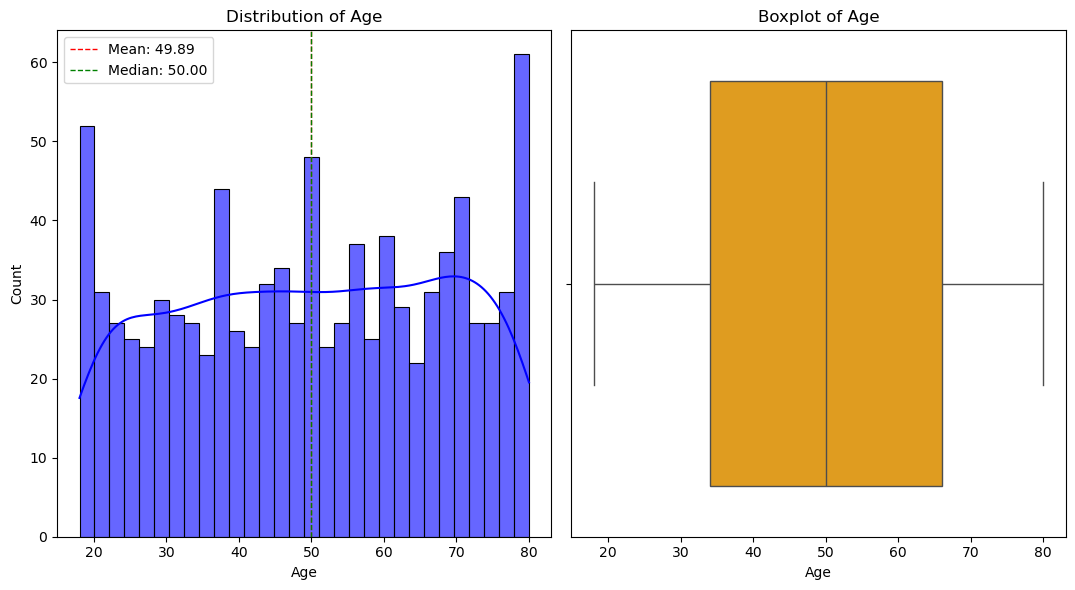

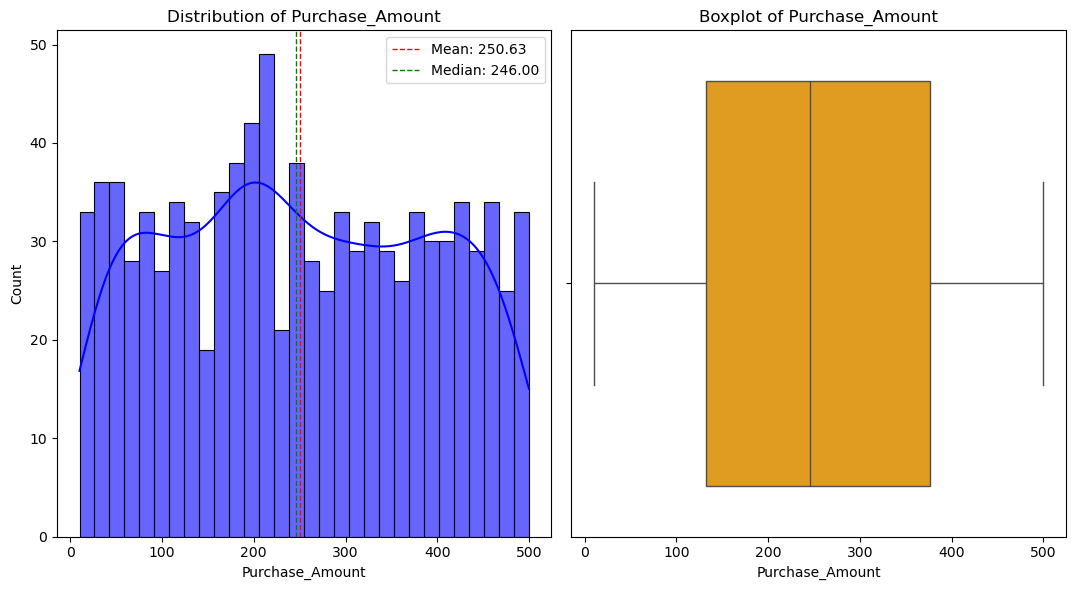

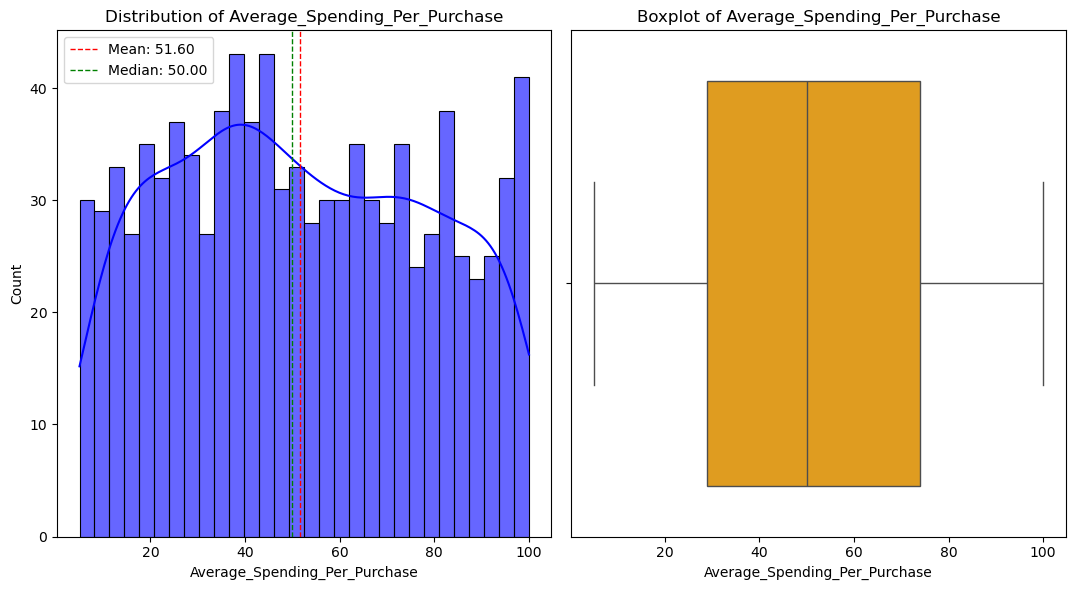

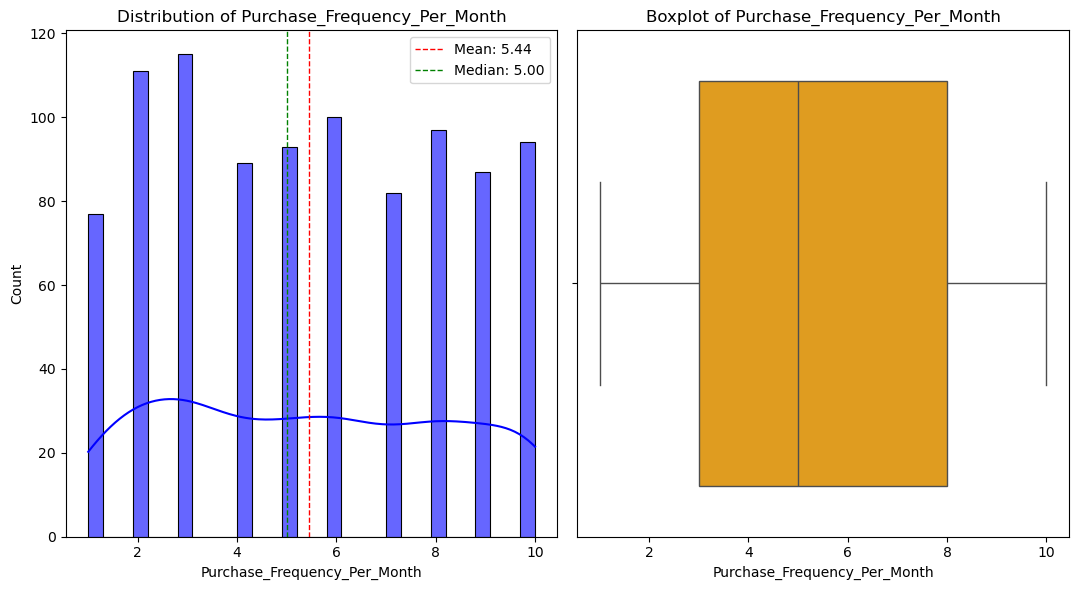

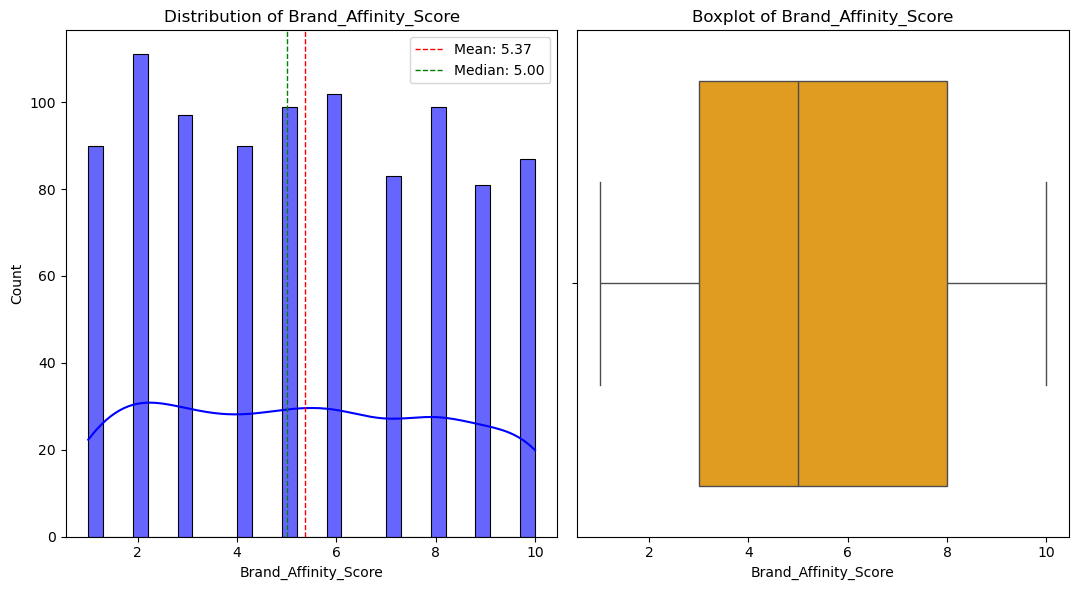

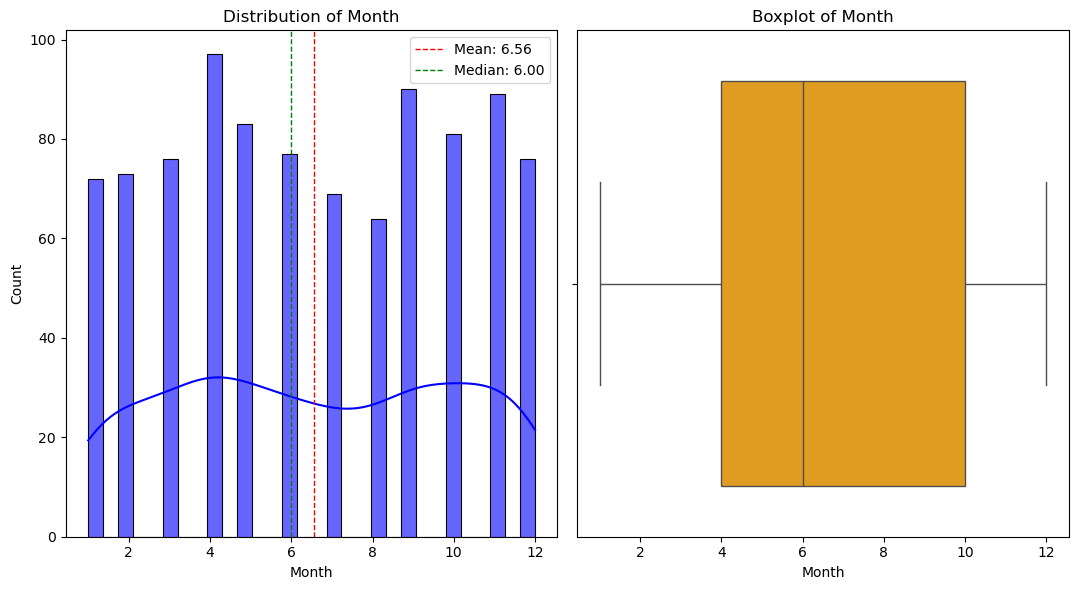

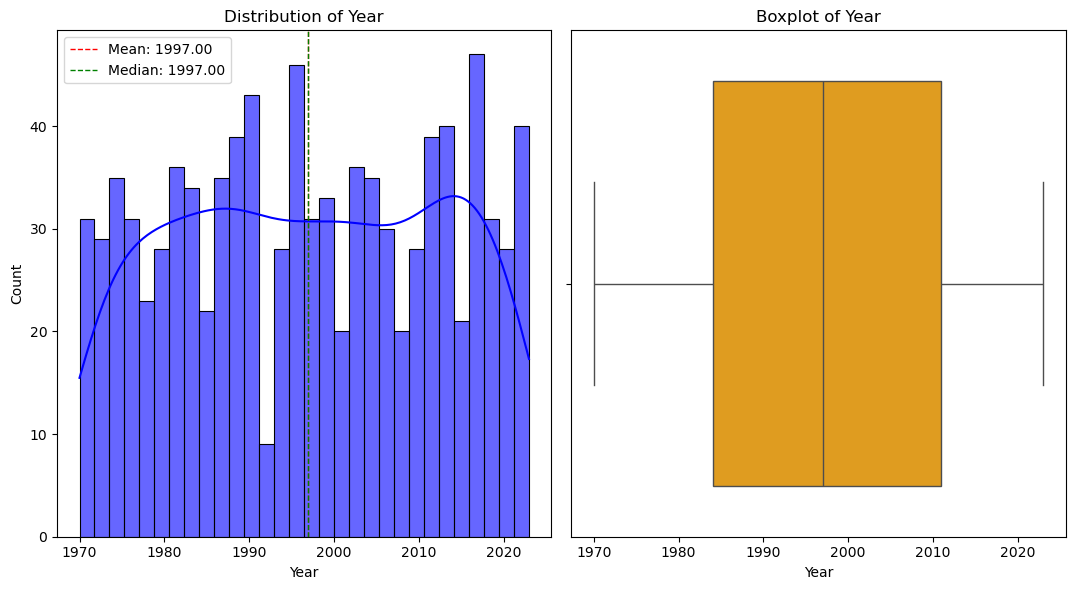

In [21]:
int_cols_plot(df, int_columns)

o Analyze outliers and determine whether to retain or remove them based on their
impact on the analysis.

o Address inconsistencies in data format and encoding.

### 3. Data Transformation:

o Create new features that provide deeper insights into customer behavior, such
as:

▪ Average spending per purchase

▪ Purchase frequency per month

▪ Brand affinity score (based on product brand preferences)

▪ Product category preferences (e.g., TVs, smartphones, laptops)

o Standardize or normalize numeric features to ensure they contribute equally to
the given algorithms.

## **Module 2: Exploratory Data Analysis (EDA):**

### 1. Univariate Analysis:

o Analyze the distribution of key features like customer age, purchase amount,
and purchase frequency using histograms, boxplots, and descriptive statistics.

o Identify potential skewness or outliers in the data.

### 2. Bivariate Analysis:

o Utilize scatterplots and heatmaps to explore relationships between different
features, such as purchase amount vs. income level, brand affinity vs. product
category, and purchase frequency vs. age.

o Investigate the presence of correlations and identify any impactful
relationships.

### 3. Temporal Analysis:

o Analyse trends in customer behaviour over time, including changes in
purchase frequency, average spending, and product preferences.

o Identify seasonal variations or any significant shifts in customer behavior
patterns.

## **Module 3: Regression and Decision Tree Analysis:**

### **A. Linear Regression Analysis:**

### 1. Problem Definition:

• Predict the average spending per purchase based on customer demographics and
purchase history.

### 2. Model Building:

• Preprocess the data by selecting relevant numerical and categorical variables (e.g.,
income level, product category, age).

• Split the dataset into training and testing sets.

### 3. Implementation:

• Train a linear regression model using the training data.

• Evaluate the model using metrics such as Mean Absolute Error (MAE), Mean
Squared Error (MSE), and R-squared.

### 4. Visualization:

• Plot the predicted vs. actual values for the test dataset.

• Include regression lines for better interpretability.

### **B. Decision Tree Analysis:**

### 1. Problem Definition:

• Classify whether a customer will make a purchase in the next month (use a binary
target variable).

### 2. Model Building:

• Engineer a binary target variable (e.g., 1 = purchase made, 0 = no purchase).

• Use features like purchase frequency, spending history, and product preferences.

### 3. Implementation:

• Train a decision tree classifier and use criteria such as Gini Impurity or
Entropy.

• Evaluate the model using metrics such as Accuracy, Precision, Recall, and F1
Score.

### 4. Visualization:

• Plot the decision tree.

• Highlight important features that influence the decision.

## **Module 4: Clustering Analysis:**

(Hint: Remove the predicted label and then apply K-Means Clustering)

### 1. Define the number of clusters(k):

• Analyze the elbow plot to determine the optimal number of clusters based on the
sum of squared distances within each other.

### 2. Apply K-Means Clustering:

• Implement K-means with the chosen k value to segment customers into distinct
clusters based on their purchase behavior and preferences.

### 3. Analyze cluster characteristics:

• Investigate key features of each cluster, such as average purchase amount, brand
affinity and product category preferences.

• Identify significant differences and similarities between clusters.

## **Module 5: Comparison and Conclusion:**

### 1. Compare the predictive performance of the regression,decision tree and K-Means
Clustering models.

• Discuss strengths, limitations, and real-world applicability in the context of
customer behavior analysis.

### 2. Provide actionable recommendations for the electronics section based on the results.